In [3]:
import pandas as pd

file_path ='../data/chipotle.tsv'

chipo =pd.read_csv(file_path, sep='\t')
print(chipo.info())
print('여기여 여기 -----------------------------')
print(chipo.info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None
여기여 여기 -----------------------------
<bound method DataFrame.info of       order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...      

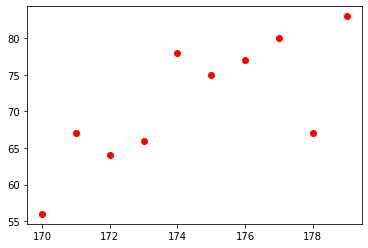

In [46]:
x =[i for i in range(170,180) ]
y =[56,67,64,66,78,75,77,80,67,83]

plt.plot(x,y,'ro')
plt.xlabel("키(cm)")
plt.ylabel("몸무게(kg)")
plt.show()


In [5]:
#chipo 라는 데이터 프레임에서 순서대로 10개의 데이터를 보여줍니다.
print(chipo.head(10))

print(chipo.columns)
print("===============================================")
print(chipo.index)





   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

In [6]:
# order_id는 숫자의 의미를 가지짖 않기 때문에 str으로 변환합니다.
chipo['order_id'] = chipo['order_id'].astype(str)
print(chipo.describe()) # 

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


In [7]:
print(len(chipo['order_id'].unique()))  #order_id의 개수를 출력합니다.
print(len(chipo['item_name'].unique())) #item_name의 개수를 출력합니다.


1834
50


In [21]:
item_count = chipo['item_name'].value_counts()[:10]

print(item_count,type(item_count),item_count.shape)


print(item_count.iteritems())
for idx, (val,cnt) in enumerate(item_count.iteritems(),1):
    print("Top ", idx, " : ", val,cnt)

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Chips                           211
Steak Bowl                      211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64 <class 'pandas.core.series.Series'> (10,)
Top  1  :  Chicken Bowl 726
Top  2  :  Chicken Burrito 553
Top  3  :  Chips and Guacamole 479
Top  4  :  Steak Burrito 368
Top  5  :  Canned Soft Drink 301
Top  6  :  Chips 211
Top  7  :  Steak Bowl 211
Top  8  :  Bottled Water 162
Top  9  :  Chicken Soft Tacos 115
Top  10  :  Chips and Fresh Tomato Salsa 110


In [23]:
#아이템별 주문 개수 출력
order_count = chipo.groupby('item_name')['order_id'].count()
print(order_count,len(order_count)) #대략 50개로 나올 것 같긴 함!

item_name
6 Pack Soft Drink                         54
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     11
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            162
Bowl                                       2
Burrito                                    6
Canned Soda                              104
Canned Soft Drink                        301
Carnitas Bowl                             68
Carnitas Burrito                          59
Carnitas Crispy Tacos                      7
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             726
Chicken Burrito                          553
Chicken Crispy Tacos                      47
Chicken Salad                              9
Chicken Salad Bowl                       110


In [24]:
#아이템별 주문 총량 출력
item_quantity = chipo.groupby('item_name')['quantity'].sum()
print(item_quantity,len(item_quantity)) #대략 50개로 나올 것 같긴 함!

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


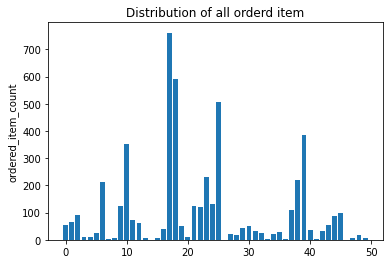

In [28]:
import matplotlib.pyplot as plt
import numpy as np

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos,order_cnt)
plt.ylabel("ordered_item_count")
plt.title("Distribution of all orderd item")

plt.show()

In [29]:
print(chipo.info())
print("------------------------")
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
------------------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [30]:
#apply()함수를 통해서 전처리를 적용합니다.
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [32]:
chipo_orderid_group = chipo.groupby('order_id').sum()


results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]

print(results)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
...            ...         ...
995              3       24.95
996              4       43.00
997              2       22.50
998              2       10.88
999              5       29.25

[1834 rows x 2 columns]


In [37]:
chipo_one_item = chipo[chipo.quantity == 1]  # 먼저 1개의 양만을 가진 item을 뽑는다.
price_per_item = chipo_one_item.groupby('item_name').min()  #동일한 아이템 이름을 가진 친구들끼리 모으고 그 다음 최저값을 도출한다.
price_per_item.sort_values(by = "item_price",ascending =False)[:]




,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


In [44]:
import numpy as np

arr =[2, 2]
print( np.mean(arr),
np.std(arr))


2.0 0.0
